In [6]:
import matplotlib.image as mpimg

from my_site.image.Algorithms.U_net_algorithm.model import *
from my_site.image.Algorithms.U_net_algorithm.data import *
from keras.callbacks import ModelCheckpoint
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

## TRAINING

In [8]:
data_gen_args = dict(rotation_range=0.2,
                     width_shift_range=0.05,
                     height_shift_range=0.05,
                     shear_range=0.05,
                     zoom_range=0.05,
                     horizontal_flip=True,
                     fill_mode='nearest')
myGene = trainGenerator(8, r'C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\train', 'image', 'label',
                        data_gen_args, save_to_dir=None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss', verbose=1, save_best_only=True)
model.fit_generator(myGene, steps_per_epoch=155, epochs=20, callbacks=[model_checkpoint])

C:\Users\Asus\AppData\Local\Temp\ipykernel_1644\3247938464.py:11: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(myGene,steps_per_epoch=155,epochs=20,callbacks=[model_checkpoint])


Found 1231 images belonging to 1 classes.
Found 1231 images belonging to 1 classes.


Exception ignored in sys.unraisablehook: <built-in function unraisablehook>
Traceback (most recent call last):
  File "C:\Users\Asus\Desktop\PCD\venv\lib\site-packages\ipykernel\iostream.py", line 535, in write
KeyboardInterrupt: 
Exception ignored in: <function BaseSession._Callable.__del__ at 0x0000016D304D4670>
Traceback (most recent call last):
  File "C:\Users\Asus\Desktop\PCD\venv\lib\site-packages\tensorflow\python\client\session.py", line 1497, in __del__
    tf_session.TF_SessionReleaseCallable(self._session._session,
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
testGene = testGenerator_many(r"C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\test")
model = unet()
model.load_weights(r"C:\Users\Asus\PycharmProjects\pythonProject1\unet_membrane.hdf5")
results = model.predict_generator(testGene, 30, verbose=1)  # model
saveResult(r"C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\predicted", results)

In [24]:
from skimage import img_as_ubyte
import cv2


def save(save_path, npyfile):
    for i, item in enumerate(npyfile):
        img = item[:, :, 0]
        img = img_as_ubyte(img)
        (thresh, blackAndWhiteImage) = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY)
        cv2.imwrite(os.path.join(save_path, "%d_predict_cv2.jpg" % i), blackAndWhiteImage)


save(r"C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\predicted", results)


Shape: (256, 256)
Dimensions: 2
Type: <class 'numpy.ndarray'>
Data type: uint8
min value, max value: (0, 95)
---
Shape: (256, 256)
Dimensions: 2
Type: <class 'numpy.ndarray'>
Data type: uint8
min value, max value: (0, 35)
---
Shape: (256, 256)
Dimensions: 2
Type: <class 'numpy.ndarray'>
Data type: uint8
min value, max value: (0, 26)
---
Shape: (256, 256)
Dimensions: 2
Type: <class 'numpy.ndarray'>
Data type: uint8
min value, max value: (0, 25)
---
Shape: (256, 256)
Dimensions: 2
Type: <class 'numpy.ndarray'>
Data type: uint8
min value, max value: (0, 126)
---
Shape: (256, 256)
Dimensions: 2
Type: <class 'numpy.ndarray'>
Data type: uint8
min value, max value: (0, 126)
---
Shape: (256, 256)
Dimensions: 2
Type: <class 'numpy.ndarray'>
Data type: uint8
min value, max value: (0, 126)
---
Shape: (256, 256)
Dimensions: 2
Type: <class 'numpy.ndarray'>
Data type: uint8
min value, max value: (0, 126)
---
Shape: (256, 256)
Dimensions: 2
Type: <class 'numpy.ndarray'>
Data type: uint8
min value, ma

In [7]:
def testGenerator_one(test_path, target_size=(256, 256), flag_multi_class=False, as_gray=True):
    img = io.imread(os.path.join(test_path), as_gray=as_gray)
    img = img / 255
    img = trans.resize(img, target_size)
    img = np.reshape(img, img.shape + (1,)) if (not flag_multi_class) else img
    img = np.reshape(img, (1,) + img.shape)

    yield img

In [56]:
from matplotlib import pyplot as plt
import pandas as pd
from my_site.image.utilities.Path_Join import p_join
from my_site.image.Traitement_image.Crop_From_Center import crop_image_from_center
from my_site.image.utilities.IOU import iou

df = pd.read_excel(r"C:\Users\Asus\Desktop\PCD\Organized dataset\metadata\metadata_good2.0.xlsx")
rslt_df_test = df[df['description'] == 'Mass-Test']
rslt_df_test = rslt_df_test.drop_duplicates('file path')
list_test = list(rslt_df_test['image full mammo path'])

filename = "4"
mammo_path = list_test[eval(filename)]
index_df = df[df['image full mammo path'] == mammo_path].index.values[0]
number = index_df
df = pd.read_excel(r"C:\Users\Asus\Desktop\PCD\Organized dataset\metadata\metadata_good2.0.xlsx")
parent_dir = r'C:\Users\Asus\Desktop\PCD\Organized dataset\preprocessed_dataset'
image_path = p_join(parent_dir, df['image full mammo path'][number])
center = eval(df['center of roi preprocessed'][number])
shape = eval(df['Shape of cropped image'][number])
g_path = os.path.join(df['file path'][number], r"GT_mask.jpg")
gt = mpimg.imread(p_join(parent_dir, g_path))
image = mpimg.imread(image_path)
# segmentation
testGene = testGenerator_one(image_path)
model = unet()
model.load_weights(r"C:\Users\Asus\PycharmProjects\pythonProject1\my_site\image\unet_membrane.hdf5")
results = model.predict_generator(testGene, 1, verbose=1)
img = results[0]
#iou coefficient
resized_gt = cv2.resize(gt, (256, 256))
img = img_as_ubyte(img)



C:\Users\Asus\AppData\Local\Temp\ipykernel_8512\1298040292.py:28: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  results = model.predict_generator(testGene, 1, verbose=1)
C:\Users\Asus\Desktop\PCD\venv\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


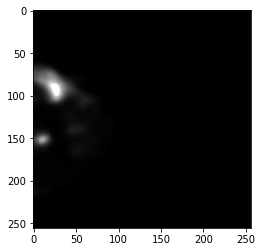

In [57]:
plt.imshow(img,cmap="gray")


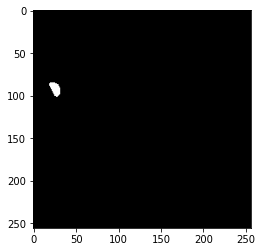

In [66]:
(thresh, predict_img) = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
plt.imshow(predict_img,cmap="gray")

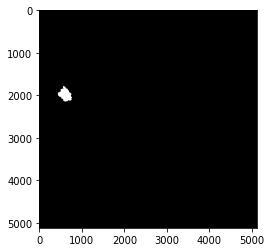

In [59]:
plt.imshow(gt, cmap="gray")

In [36]:
cv2.imwrite(r'C:\Users\Asus\PycharmProjects\pythonProject1\temp\test2.jpg',resized_gt)

True

In [12]:
cv2.imwrite(r'C:\Users\Asus\PycharmProjects\pythonProject1\temp\test.jpg', predict_img)

True

In [48]:
# Get the scaling factor
img_shape = gt.shape
reshaped_img_shape = (256, 256)
scale = np.flipud(np.divide(reshaped_img_shape,
                            img_shape))  # you have to flip because the image.shape is (y,x) but your corner points are (x,y)

#use this on to get new top left corner and bottom right corner coordinates
new_center = int(np.multiply(center, scale)[0]), int(np.multiply(center, scale)[1])
new_shape = int(np.multiply(shape, scale)[0]+20), int(np.multiply(shape, scale)[1]+20)

y_true = crop_image_from_center(resized_gt, shape=new_shape, center=new_center)
y_pred = crop_image_from_center(predict_img, shape=new_shape, center=new_center)

iou(y_true, y_pred)

IoU is 0.38333333333333336


0.38333333333333336

In [49]:
from my_site.image.utilities.IOU import iou

print(iou(y_true, y_pred))

IoU is 0.38333333333333336
0.38333333333333336


In [52]:
intersection = 0
union = new_shape[0]*new_shape[1]
for i in range(y_true.shape[0]) :
    for j in range(y_true.shape[1]):
        if y_true[i][j] == y_pred[i][j]  :
            intersection+=1
print(intersection/union)

0.9458128078817734


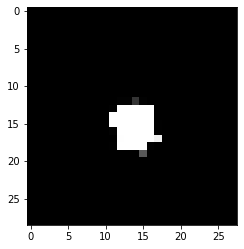

In [46]:
from my_site.image.Traitement_image.Restore_image import restore_mask

plt.imshow(y_true, cmap="gray")

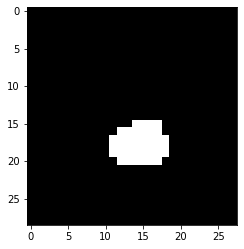

In [47]:
from my_site.image.Traitement_image.Restore_image import restore_mask

plt.imshow(y_pred, cmap="gray")

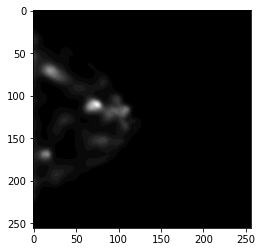

In [19]:
plt.imshow(img, cmap="gray")

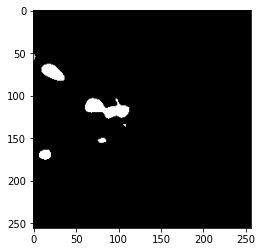

In [24]:
img = img_as_ubyte(img)
(thresh, blackAndWhiteImage) = cv2.threshold(img, 5, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage, cmap="gray")

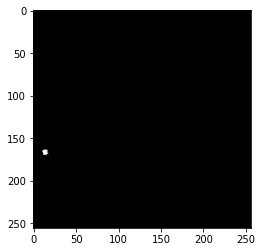

In [25]:
plt.imshow(resized_gt, cmap="gray")

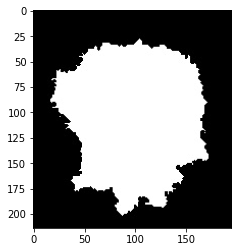

In [23]:
from my_site.image.Traitement_image.Crop_From_Center import crop_image_from_center

c = crop_image_from_center(gt, shape=shape, center=center)

plt.imshow(c, cmap="gray")

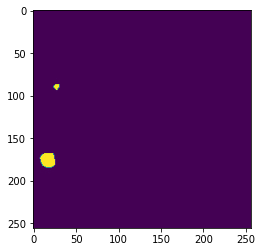

In [60]:
path_image = r"C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\predicted\0_predict_cv2.jpg"
why = mpimg.imread(path_image)
plt.imshow(why)

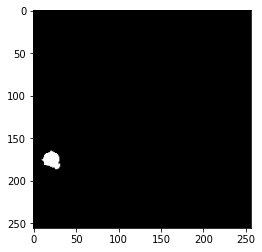

In [58]:
resized_image = cv2.resize(gt, why.shape)
plt.imshow(resized_image, cmap="gray")


(176, 22)
(24, 24)


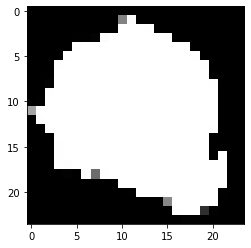

In [70]:
# Get the scaling factor
img_shape = gt.shape
reshaped_img_shape = why.shape
scale = np.flipud(np.divide(reshaped_img_shape,
                            img_shape))  # you have to flip because the image.shape is (y,x) but your corner points are (x,y)

#use this on to get new top left corner and bottom right corner coordinates
new_center = int(np.multiply(center, scale)[0]), int(np.multiply(center, scale)[1])
new_shape = int(np.multiply(shape, scale)[0]), int(np.multiply(shape, scale)[1])
print(new_center)
print(new_shape)
y_true = crop_image_from_center(resized_image, shape=new_shape, center=new_center)
y_pred = crop_image_from_center(why, shape=new_shape, center=new_center)
plt.imshow(y_true, cmap="gray")

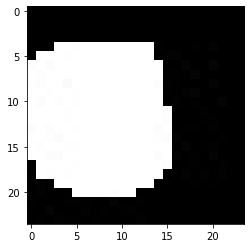

In [69]:
plt.imshow(y_pred, cmap="gray")

In [73]:
from my_site.image.utilities.Dice_coef import dice_coef
from my_site.image.utilities.IOU import iou

print(iou(y_true, y_pred))
print(dice_coef(y_true, y_pred))

IoU is 0.5764411027568922
0.5764411027568922
Dice coefficient is 0.5833333333333334
0.5833333333333334


## Output one element

In [2]:
testGene = testGenerator_one(r"C:\Users\Asus\Desktop\PCD\Organized dataset\train_test_data\test\0.jpg")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene, 1, verbose=1)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13096\987203364.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  results = model.predict_generator(testGene,1,verbose=1)
C:\Users\Asus\Desktop\PCD\venv\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [7]:
print(type(results[0]))
print(results[0].shape)

<class 'numpy.ndarray'>
(256, 256, 1)


In [8]:
img = results[0]
img = img[:, :, 0]
img = img_as_ubyte(img)
(thresh, blackAndWhiteImage) = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY)

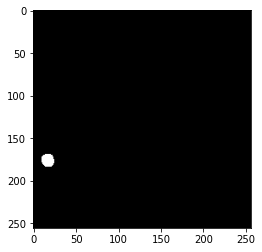

In [12]:
import matplotlib.pyplot as plt

plt.imshow(blackAndWhiteImage, cmap="gray")